<a href="https://colab.research.google.com/github/NaraAndrad3/Monitoramento_Obesidade/blob/main/Obesidade_Sistemas_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Sistemas Inteligentes

- Encontrar Algoritmo que se ajuste;
- Criar e Treinar um modelo;
- Desenvolver app de detecção de obesidade em todos os niveis

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bibliotecas

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np
import joblib # -->  save the model !!! Remember

# Carregamento dos Dados

In [118]:
data = pd.read_csv('/content/drive/MyDrive/obesity/ObesityDataSet_raw_and_data_sinthetic.csv', delimiter = ',')

In [119]:
s = data

In [ ]:
r = s[s['NCP'] == 4]
r

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
18,Female,30.000000,1.710000,82.000000,yes,yes,3.000000,4.0,Frequently,yes,1.000000,no,0.0,0.000000,no,Automobile,Overweight_Level_II
25,Male,20.000000,1.600000,50.000000,yes,no,2.000000,4.0,Frequently,yes,2.000000,no,3.0,2.000000,no,Public_Transportation,Normal_Weight
27,Female,23.000000,1.600000,52.000000,no,yes,2.000000,4.0,Frequently,no,2.000000,no,2.0,1.000000,Sometimes,Automobile,Normal_Weight
30,Male,29.000000,1.770000,83.000000,no,yes,1.000000,4.0,Frequently,no,3.000000,no,0.0,1.000000,no,Motorbike,Overweight_Level_I
34,Male,22.000000,1.650000,62.000000,no,yes,2.000000,4.0,Frequently,no,2.000000,no,2.0,0.000000,Sometimes,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Male,19.865895,1.760330,55.370700,yes,yes,2.120185,4.0,Sometimes,no,2.582165,no,2.0,1.510609,no,Automobile,Insufficient_Weight
730,Male,17.925497,1.829142,59.933015,yes,yes,2.860990,4.0,Sometimes,no,2.000000,no,2.0,0.007872,no,Automobile,Insufficient_Weight
732,Male,17.362129,1.806710,59.243506,yes,yes,2.424977,4.0,Sometimes,no,2.000000,no,2.0,0.039210,no,Automobile,Insufficient_Weight
798,Male,19.475540,1.857231,88.138777,yes,yes,2.061952,4.0,Sometimes,no,2.426465,no,2.0,0.160138,Sometimes,Public_Transportation,Overweight_Level_I


In [120]:
s['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [121]:
obesity = data['NObeyesdad']

In [122]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

- Transformando os dados tipo String em dados categoricos

In [124]:
#'family_history_with_overweight', 'FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad'
# Gender
genero = data['Gender']
le = LabelEncoder()
genero = le.fit_transform(genero)

# family_history_with_overweight
family = data['family_history_with_overweight']
le = LabelEncoder()
family = le.fit_transform(family)

#FAVC
fAVC = data['FAVC']
le = LabelEncoder()
fAVC = le.fit_transform(fAVC)

#CAEC
CAEC = data['CAEC']
le = LabelEncoder()
CAEC = le.fit_transform(CAEC)

#SMOKE
SMOKE = data['SMOKE']
le = LabelEncoder()
SMOKE = le.fit_transform(SMOKE)

#SCC
SCC = data['SCC']
le = LabelEncoder()
SCC = le.fit_transform(SCC)

#CALC
CALC = data['CALC']
le = LabelEncoder()
CALC = le.fit_transform(CALC)

#MTRANS
MTRANS = data['MTRANS']
le = LabelEncoder()
MTRANS = le.fit_transform(MTRANS)

#NObeyesdad
NObeyesdad = data['NObeyesdad']
le = LabelEncoder()
NObeyesdad = le.fit_transform(NObeyesdad)

In [125]:
genero, family, fAVC, CAEC, SMOKE, SCC, CALC, MTRANS, NObeyesdad

(array([0, 0, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([0, 0, 0, ..., 1, 1, 1]),
 array([2, 2, 2, ..., 2, 2, 2]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([3, 2, 1, ..., 2, 2, 2]),
 array([3, 3, 3, ..., 3, 3, 3]),
 array([1, 1, 1, ..., 4, 4, 4]))

In [126]:
data.drop(['Gender','family_history_with_overweight', 'FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad'], axis = 1, inplace = True)

In [127]:
genero = pd.DataFrame(genero, columns = ['genero'])
family = pd.DataFrame(family, columns = ['family'])
FAVC = pd.DataFrame(fAVC, columns = ['FAVC'])
CAEC = pd.DataFrame(CAEC, columns = ['CAEC'])
SMOKE = pd.DataFrame(SMOKE, columns = ['SMOKE'])
SCC = pd.DataFrame(SCC, columns = ['SCC'])
CALC = pd.DataFrame(CALC, columns = ['CALC'])
MTRANS = pd.DataFrame(MTRANS, columns = ['MTRANS'])
NObeyesdad = pd.DataFrame(NObeyesdad, columns = ['NObeyesdad'])

In [128]:
data = pd.concat([data,genero,family,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad], axis=1)

- Categoria: {
    - 0 : Insufficient_Weight,
    -  1 : Normal_Weight,
    - 2 : Obesity_Type_I,
    - 3 : Obesity_Type_II,
    - 4 : Obesity_Type_III,
    - 5 : Overweight_Level_I,
    - 6 : Overweight_Level_II

}

In [129]:
data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,genero,family,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0,1,0,2,0,0,3,3,1
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0,1,0,2,1,1,2,3,1
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,1,0,2,0,0,1,3,1
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1,0,0,2,0,0,1,4,5
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1,0,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,1,1,2,0,0,2,3,4
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,1,1,2,0,0,2,3,4
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,1,1,2,0,0,2,3,4
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,1,1,2,0,0,2,3,4


In [ ]:
data['FCVC'].value_counts()

FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64

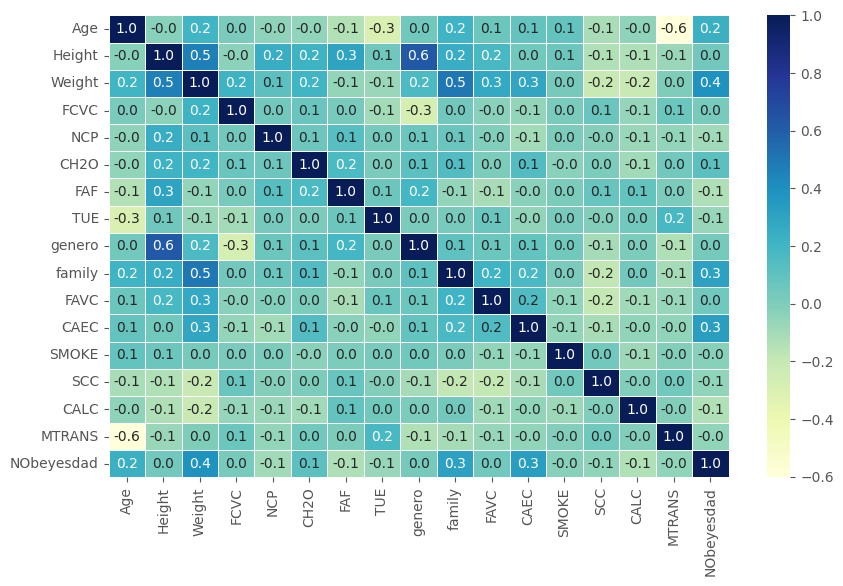

<Axes: >

In [130]:
correlacao = data.corr()
plt.figure(figsize=(10,6))
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.5, cmap="YlGnBu")
plt.show()
plot

# Divisão dos Dados em Treino e Teste

In [131]:
X = data.drop(['NObeyesdad'], axis = 1)
y = data['NObeyesdad']

In [ ]:
y_test.value_counts()

NObeyesdad
2    99
0    79
5    77
4    77
3    70
6    69
1    57
Name: count, dtype: int64

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=1)

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1583, 16), (528, 16), (1583,), (528,))

# Algoritmos de Classificação

  - Random Forest Classifier
  - KNN
  - SVM

## Random Forest Classifier
 - max_depth: Profundidade máxima da árvore.
 - N_estimator = 100(defalt)

In [134]:
# --> params : N_estimator = 100(defalt), max_depth: Profundidade máxima da árvore.
forest = RandomForestClassifier(n_estimators = 150,max_depth = 10, random_state = 1, min_samples_leaf = 20)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=150,
                       random_state=1)

In [135]:
y_pred = forest.predict(X_test)

In [137]:
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')
revocacao = recall_score(y_test, y_pred, average='weighted')

print("Acuracia: ", acuracia)
print("Precisao: ", precisao)
print("Revocacao: ", revocacao)

Acuracia:  0.8712121212121212
Precisao:  0.8853776381258346
Revocacao:  0.8712121212121212


In [138]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.59      0.79      0.68        57
           2       0.94      0.84      0.89        99
           3       0.90      1.00      0.95        70
           4       1.00      1.00      1.00        77
           5       0.95      0.69      0.80        77
           6       0.82      0.84      0.83        69

    accuracy                           0.87       528
   macro avg       0.87      0.87      0.87       528
weighted avg       0.89      0.87      0.87       528



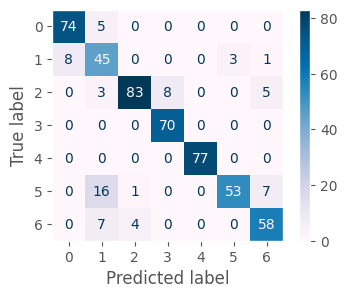

In [141]:
plt.rcParams['figure.figsize'] = (4, 3)
plt.style.use('ggplot')


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
cmap = 'PuBu'

disp.plot(cmap=cmap)
plt.grid(False)
plt.show()

### Save the model ( Criar pasta no drive e salvar o modelo que será utilizado (até então o knn teve o melhor result))

In [ ]:
joblib.dump(forest, 'models/foret.sav') # --> save the model !!! Remember

## KNN
- n_neighbors: Numero de vizinhos.
- weights: Peso atribuídos aos vizinhos (com distance os vizinhos mais próximos têm maior influencia)
- leaf_size:  Tamanho da folha passado para o BallTree ou KDTree. Afeta a velocidade de construção e consulta da árvore, bem como a quantidade de memória usada.
- metric: métrica usada para o calculo da distância entre os vizinhos (estamos usando a de manhattan (acc: 94%), [euclidean: acc: 89%, minkowski: 89%])


In [ ]:
import pickle

In [142]:
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance', algorithm = 'auto', leaf_size = 20, metric='manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, metric='manhattan', weights='distance')

In [143]:
knn_pred = knn.predict(X_test)

In [ ]:
joblib.dump(knn,'/content/drive/MyDrive/obesity/models/knn.pkl') # --> save the model !!! Remember

['/content/drive/MyDrive/obesity/models/knn.pkl']

In [ ]:
X_test.shape

(528, 16)

In [144]:
acuracia = accuracy_score(y_test, knn_pred)
precisao = precision_score(y_test, knn_pred, average='weighted')
revocacao = recall_score(y_test, knn_pred, average='weighted')

print("Acuracia: ", acuracia)
print("Precisao: ", precisao)
print("Revocacao: ", revocacao)

Acuracia:  0.9450757575757576
Precisao:  0.9472628498353791
Revocacao:  0.9450757575757576


In [145]:
report = classification_report(y_test, knn_pred)

print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        79
           1       0.97      0.67      0.79        57
           2       0.96      0.97      0.96        99
           3       0.99      1.00      0.99        70
           4       1.00      1.00      1.00        77
           5       0.93      0.97      0.95        77
           6       0.89      0.94      0.92        69

    accuracy                           0.95       528
   macro avg       0.95      0.93      0.94       528
weighted avg       0.95      0.95      0.94       528



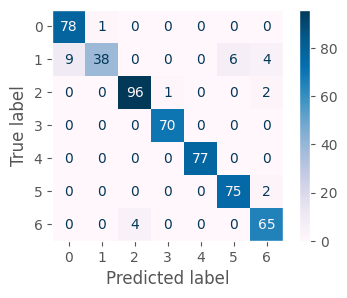

In [146]:
plt.rcParams['figure.figsize'] = (4, 3)
plt.style.use('ggplot')


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, knn_pred), display_labels=np.unique(y_test))
cmap = 'PuBu'

disp.plot(cmap=cmap)
plt.grid(False)
plt.show()

In [ ]:
joblib.dump(knn,'/content/drive/MyDrive/obesity/models/knn.pkl') # --> save the model !!! Remember

['/content/drive/MyDrive/obesity/models/knn.pkl']

## Support Vector Machine
- kernel: Especifica o tipo de kernel a ser usado no algoritmo

In [147]:
svm_model = svm.SVC(C=1.0, kernel='linear', degree=5, gamma='scale', coef0=0.0,
                         shrinking=True, probability=False, tol=1e-3, cache_size=200,
                         class_weight='balanced', verbose=True, max_iter=-1,
                         decision_function_shape='ovo', break_ties=False, random_state=1)



In [148]:
svm_model.fit(X_train, y_train)

[LibSVM]

SVC(class_weight='balanced', decision_function_shape='ovo', degree=5,
    kernel='linear', random_state=1, verbose=True)

In [149]:
svm_pred = svm_model.predict(X_test)

In [150]:
acuracia = accuracy_score(y_test, svm_pred)
precisao = precision_score(y_test, svm_pred, average='weighted')
revocacao = recall_score(y_test, svm_pred, average='weighted')

print("Acuracia: ", acuracia)
print("Precisao: ", precisao)
print("Revocacao: ", revocacao)

Acuracia:  0.8674242424242424
Precisao:  0.8677499722958318
Revocacao:  0.8674242424242424


In [151]:
report = classification_report(y_test, svm_pred)

print(report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        79
           1       0.86      0.65      0.74        57
           2       0.89      0.86      0.87        99
           3       0.93      1.00      0.97        70
           4       1.00      0.99      0.99        77
           5       0.79      0.77      0.78        77
           6       0.73      0.77      0.75        69

    accuracy                           0.87       528
   macro avg       0.87      0.86      0.86       528
weighted avg       0.87      0.87      0.87       528



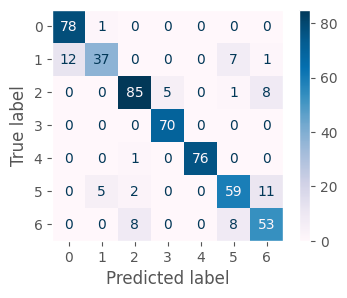

In [152]:
plt.rcParams['figure.figsize'] = (4, 3)
plt.style.use('ggplot')


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, svm_pred), display_labels=np.unique(y_test))
cmap = 'PuBu'

disp.plot(cmap=cmap)
plt.grid(False)
plt.show()

## Gradient Boosting

In [ ]:
gbm = GradientBoostingClassifier(loss='log_loss',n_estimators=1000, learning_rate=0.01,criterion='friedman_mse', random_state=42, warm_start = True, validation_fraction = 0.2)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,
                           random_state=42, validation_fraction=0.2,
                           warm_start=True)

In [ ]:
grad_pred = gbm.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, grad_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.29734848484848486


In [ ]:
acuracia = accuracy_score(y_test, grad_pred)
precisao = precision_score(y_test, grad_pred, average='weighted')
revocacao = recall_score(y_test, grad_pred, average='weighted')

print("Acuracia: ", acuracia)
print("Precisao: ", precisao)
print("Revocacao: ", revocacao)

Acuracia:  0.9583333333333334
Precisao:  0.9591199806141505
Revocacao:  0.9583333333333334


In [ ]:
report = classification_report(y_test, grad_pred)

print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        79
           1       0.87      0.93      0.90        57
           2       0.98      0.99      0.98        99
           3       0.97      1.00      0.99        70
           4       1.00      0.99      0.99        77
           5       0.96      0.87      0.91        77
           6       0.93      0.96      0.94        69

    accuracy                           0.96       528
   macro avg       0.95      0.96      0.96       528
weighted avg       0.96      0.96      0.96       528



In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use('ggplot')


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
cmap = 'PuBu'

disp.plot(cmap=cmap)
plt.title('Matriz de Confusão - Random Forest Classifier')
plt.grid(False)
plt.show()

#References
 https://www.sakurai.dev.br/classificacao-usando-knn/

 https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/svm.html

https://medium.com/@ilyurek/gradient-boosting-machines-gbm-with-python-example-b65421d10f2a

